# Unit Root Tests




In [2]:
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt



Random walk model without a drift

$$
\begin{align}
x_{t} = x_{t - 1} + e_{t}, e_t \sim N(0, \sigma^2)\\
\Delta x_{t} = x_{t} - x_{t - 1} = e_{t}\\
f' = \lim_{\epsilon \to 0}\frac{f(x) - f(x + \epsilon)}{\epsilon}
\end{align}
$$

The solution of the characteristic equation of this model is equal to one. We say that *the equation has a unit root*.

$$
\lambda - 1 = 0 \implies \\
\lambda^* = 1
$$

The solution of this characteristic equation is 1. We say that the characteristic equation has a unit root.

ARIMA(0, 1, 0)

## Random Walks Simulation



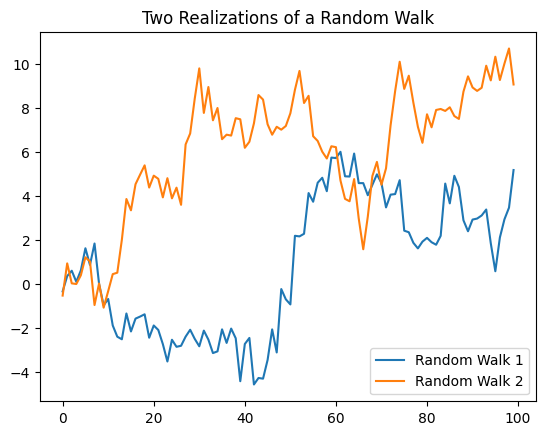

In [35]:
rw1 = np.cumsum(np.random.normal(size=100))
rw2 = np.cumsum(np.random.normal(size=100))

plt.plot(rw1, label='Random Walk 1')
plt.plot(rw2, label='Random Walk 2')
plt.legend()
plt.title('Two Realizations of a Random Walk')
plt.show()

In [37]:
from statsmodels.formula.api import ols
import pandas as pd

ols_fit = ols("rw2 ~ rw1", data = pd.DataFrame(rw1, rw2)).fit()
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rw2   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.688
Date:                Mon, 10 Nov 2025   Prob (F-statistic):              0.197
Time:                        09:42:28   Log-Likelihood:                -250.41
No. Observations:                 100   AIC:                             504.8
Df Residuals:                      98   BIC:                             510.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8719      0.309     19.025      0.000       5.259       6.484
rw1            0.1271      0.098      1.299      0.197      -0.067       0.321
==============================================================================
Omnibus:                        9.404   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.096
Skew:                          -0.753   Prob(JB):                      0.00642
Kurtosis:                       2.605   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$
x_{t}: \text{ random walk 2} \\
x_{t}: \text{ random walk 1} \\
x_{t} = \beta_0 + \beta_1 x_{t} + u_{t}, u_{t} \sim N(0, \sigma^2)
$$

Estimated regression equation

$$
\hat{y}_{t} = 6.15 - 1.78 x_{t}
$$

T-Test of the hypothesis 

$$
H_0: \beta_1 = 0\\
H_1: \beta_1 \neq 0
$$
We reject the null hypothesis if the p-value of the test is less than 0.05 (convention).

Spurious regression if y and x are unit-root processes.

$$
\hat{y}_{t} = -1.86 + 0.19 x_{t}
$$

## How to check for spurious regression?



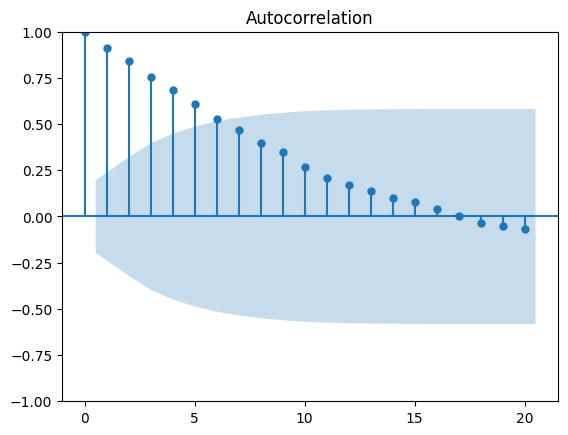

In [ ]:
# acf of residuals:

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ols_fit.resid)
plt.show()



## Dickey-Fuller Test

AR(1) process without a constant

$$
x_{t} = \phi_1 x_{t - 1} + e_{t}, e_t \sim WN(\sigma^2)
$$

If the process has a unit root, it follows that $\phi_1 = 1$. We would like to test the hypothesis:

$$
H_0: \phi_1 = 1 \\
H_1: \phi_1 < 1
$$

The first difference of the random walk process is stationary, because it is
simply equal to the pure random process $e_{t}$ and it is stationary by the properties of the pure random process. We say that the process (in this case the random walk process) is integrated of order 1.

## Dickey-Fuller Unit Root Test

$$
\begin{align}
x_{t} - x_{t - 1} = \phi_1 x_{t - 1} + e_{t} - x_{t - 1} \\
\iff\\
\Delta x_{t} = (\phi_1 - 1)x_{t - 1} + e_t
\end{align}
$$

$$
\phi_1 - 1 = 0 \iff \phi_1 = 1
$$

We can use the t-statistic for testing the hypothesis that the coefficient 
of $x_{t - 1}$ equals 0, but the distribution of this statistic under the $H_0$ (assuming that $\phi_1 = 1$) is not a t-distribution. Therefore, we need to use
special critical values in order to perform the test.

```{r}
summary(ur.df(rw1, type = "none", lags = 0))
```

-1 in the regression formula instructs lm to exclude the
intercept from the regression equation.

$$
\underbrace{\Delta x_{t}}_{z.diff} = \underbrace{x_{t - 1}}_{z.lag.1} + e_t
$$
t-value is the value of the t-statistic.

$$
t = \frac{\hat{\beta}_1 - 0}{SE(\hat{\beta}_1)}
$$

$$
-0.007011 / 0.008509 = -0.824
$$
To perform the test, compare the t-value with the critical values:

      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62

and we reject the null hypothesis if the t-value value is lower than the critical values.

-0.824 > -1.62 (the critical value corresponding to a 10% significance level), so we cannot reject the null hypothesis.

$$
H_0: \phi_1 - 1 = 0
$$

## Simulation 2: Stationary AR(1) with zero level

$$
x_{t} = 0.7x_{t - 1} + e_{t}, e_t \sim WN(1)
$$

```{r}
set.seed(5445)
ar1 <- arima.sim(n = 200, model = list(ar = 0.7))
plot(ar1)
```

```{r}
summary(ur.df(ar1, type = "none", lags = 0))
```

-6.54 < -2.58 < -1.95 => reject the null hypothesis of presence of a unit root

## Simulation 2: Stationary AR(1) with non-zero level

$$
x_{t} = 100 + 0.7x_{t - 1} + e_{t}, e_t \sim N(0, 1)
$$

```{r}
ar2 <- 100 + ar1
plot(ar2)
```

```{r}
summary(ur.df(ar2, type = "none", lags = 0))
```

```{r}
summary(ur.df(ar2, type = "drift", lags = 0))
```
Compare the t-value (-6.253) to the critical values:

      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57

-6.253 < -3.46 (1-percent critical value) => we reject the
null hypothesis at a 1-percent significance level.


## Simulation 3 (Stationary AR(1) with trend)

$$
x_{t} = 10 + 0.1t + 0.7 x_{t - 1} + e_{t}, e_t \sim N(0, 1)
$$


```{r}
ar3 <- 10 + 0.1*(1:length(ar1)) + ar1
plot(ar3)
```

```{r}
summary(ur.df(ar3, type = "drift", lags = 0))
```
-0.9984 > -2.57 => the test fails to reject the null hypothesis
at any reasonable significance level.

```{r}
summary(ur.df(ar3, type = "trend", lags = 0))
```
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13

-6.2976 < -3.99 => reject the null hypothesis at a 1-percent significance level.

## ADF-Test

Let us consider an AR(2) process

$$
x_{t} = \phi_1 x_{t - 1} + \phi_2 y_{t - 2} + e_t
$$

If this process has a unit root, then its characteristic equation

$$
\lambda ^2 - \phi_1 \lambda - \phi_2 = 0
$$

has a solution $\lambda^{*} = 1$, therefore, setting $\lambda = 1$ satisfies the equation, and we obtain:

$$
1^2 - \phi_1 - \phi_2 = 0
$$

Therefore, if the process has a unit root, its coefficients sum to one. This is a hypothesis that we can test using data. Following the approach of the DF-Test, we can try to construct a regression equation where one of the coefficients is $1 - \phi_1 - \phi_2$. Then we can conduct a test of the null hypothesis that this coefficient is zero.

It turns out that we can reparemetrize the AR(2) model to obtain such an equation:

$$
\begin{align}
x_{t} - x_{t - 1} & = \phi_1 x_{t - 1} - x_{t - 1} + \phi_2 y_{t - 2} + e_t\\
\Delta x_{t} & = (\phi_1 - 1)x_{t - 1} + \phi_2 y_{t - 2} + e_t\\
\Delta x_{t} & = (\phi_1 - 1)x_{t - 1} + \phi_2 x_{t - 1} - \phi_2 x_{t - 1} + \phi_2 y_{t - 2} + e_t\\
\Delta x_{t} & = (\phi_1 + \phi_2 - 1)x_{t - 1} - \phi_2 x_{t - 1} \phi_2 y_{t - 2} + e_t\\
\Delta x_{t} & = (\phi_1 + \phi_2 - 1)x_{t - 1} - \phi_2(x_{t - 1} - y_{t - 2}) + e_t\\
\Delta x_{t} & = (\phi_1 + \phi_2 - 1)x_{t - 1} - \phi_2\Delta x_{t - 1} + e_t\\
\end{align}
$$

In the general case of an AR(p) process the equation looks more complicated but it is derived in exactly the same way as for the AR(2) process:

$$
\Delta y_t = (\rho - 1) x_{t - 1} + \theta_{1} \Delta x_{t - 1} + \theta_2 \Delta y_{t - 2} + \ldots + \theta_{p - 1} \Delta y_{t - p + 1} + e_t
$$

where $\rho$ and $\theta_i$ are defined as:

$$
\rho = \sum_{j = 1}^p \alpha_j \\
\theta_i = - \sum_{j = i + 1}^{p} \alpha_j
$$
## Information Criteria

$$
AIC = -2 \log(L) + 2(p + q + k + 1)
$$

$$
AICe = -2 \log(L) + 2(p + q + k + 1) + \frac{2(p + q + k + 1)(p + q + k + 2)}{T - p - q - k - 2}
$$

## Simulation: AR(3)

$$
y_t = 0.6x_{t - 1} + 0.4y_{t - 2} - 0.7y_{t - 2} + e_t, e_t \sim N(0, 1)
$$

```{r}
set.seed(521)
ar4 <- arima.sim(n = 200, model = list(ar = c(0.6, 0.4, -0.7)))
plot(ar4)

fit <- arima(ar4, order = c(1, 0 , 1))
fit1 <- arima(ar4, order = c(2, 0, 0))
AIC(fit, fit1)
```

```{r}
summary(ur.df(ar4, type = "none", lags = 0))
```

```{r}
summary(ur.df(ar4, type = "none", selectlags = "AIC"))
```

## Application

```{r}
dt <- read_csv("https://github.com/febse/data/raw/refs/heads/main/sim.csv")
dt_ts <- ts(dt$x, start = 1990, frequency = 12)
dt_ts
```



## KPSS Test

The KPSS test considers stationarity as the null hypothesis. Let's consider the following process:

$$
y_t = \alpha_t + \beta t + e_t, e_t \sim WN(\sigma^2)
$$

where $\alpha_t$ is a random walk process: $\alpha_t = \alpha_{t - 1} + \epsilon_t$. If $y_t$ is trend-stationary (i.e. has no unit roots), then the variance of $\epsilon_t$ is zero (i.e. $\alpha_t$ is a constant process).

With the KPSS test we reject the null hypothesis (trend-stationarity)
for _large_ values of the test statistic.

```{r}
summary(ur.kpss(rw1))
summary(ur.kpss(ar1))
```